In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import networkx as nx
from pyvis.network import Network


In [2]:
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in xrange(0, len(l), n))

def swap1(paths):
    #paths = paths.tolist()
    path1index = random.randrange(len(paths))
    path2index = random.randrange(len(paths))
    
    while len(paths[path2index]) == 0 :
        path2index = random.randrange(len(paths))
    
    while path1index == path2index:
        path1index = random.randrange(len(paths))
    
    randP1 = math.ceil(random.random()*2)
    randP2 = math.ceil(random.random()*2)
    #print("rp1 " + str(math.ceil(randP1)))
    #print("rp2 " + str(math.ceil(randP2)))
    
    path1 = np.array(paths[path1index]).tolist()
    path2 = np.array(paths[path2index]).tolist()

    #print(path1) 
    #print(path2) 
    
    #x1 = path1[0] if randP1 == 1 else path1[len(path1)-1]
    #if list à 1 element cas particlier
    #x2 = path1[1] if randP1 == 1 else path1[len(path1)-2]
    
    y1 = path2[0] if randP2 == 1 else path2[len(path2)-1]
    #same si 1 element
    #y2 = path2[1] if randP2 == 1 else path2[len(path2)-2]

    #print(x1)
    #print(x2)
    
    #print(y1)
    
    #print(y2)
    
    #print("swap extra")
    
    #paths[path1index].insert(0,y1)
    #paths[path1index]= path1
    #paths[path1index]= path1

    #print("pre insert " + str(path1))
    #print("insert "+ str(y1))
    path1.insert(0,y1)
    #print("post insert " + str(path1))


    path2.remove(y1)
    paths[path1index] = path1
    paths[path2index] = path2

    
    #print(path1)
    #print(path2)
    #print("swaped extra")
    return paths

In [3]:
def swap2(paths):
    print("swap entrées intra")
    #paths = paths.tolist()
    path1index = random.randrange(len(paths))
    
    path1 = paths[path1index]
    
    while len(path1) < 2 :
        path1index = random.randrange(len(paths))
        path1 = paths[path1index]
        print("in while 1")
    
    
    rand1 = random.randrange(len(path1))
    
    rand2 = random.randrange(len(path1))
    
    print("randrange "+str(len(path1)))
    print("rand1 " + str(rand1))
    print("rand2 " + str(rand2))
    print(path1)
    
    while rand1 == rand2 :
        rand2 = random.randrange(len(path1))
        print("in while 2")
        print("regenerated rand2 "+ str(rand2))

    
    x1 = path1[rand1]
    x2 = path1[rand2]
    #same si 1 element
    
    path1[rand1] , path1[rand2] = path1[rand2] , path1[rand1]

    paths[path1index] = path1

    
    #print(path1)
    #print(path2)
    #print("swaped extra")
    return paths

In [4]:
def swap3(x):
    print("swap3")

In [5]:
def printError(x):
    print("random out of bound")

In [6]:
def switchAction(x):
    #print("x "+ str(x))
    switcher = {
        1:swap1,
        2:swap2,
        3:swap3
        
    }
    #print("xx "+ str(x))
    return switcher.get(x,printError)

In [7]:
def f(x, matrice):
    total_sum = 0
    for cycle in x :
        #print("cycle : "+ str(cycle))
        cycle_sum = 0
        if(len(cycle)>0) :
            for i in range(len(cycle)-1) :
                if i == 0 :
                    cycle_sum += matrice[cycle[i]][0]
                    #print("0 to node "+ str(cycle[i])+" : "+ str(matrice[cycle[i]][0]))
                else :
                    cycle_sum += matrice[cycle[i]][cycle[i-1]]
                    #print("node "+str(cycle[i-1])+" to node "+str(cycle[i])+" : "+str(matrice[cycle[i]][cycle[i-1]]))

            #print("node "+ str(cycle[len(cycle)-1])+" to 0 : "+ str(matrice[cycle[len(cycle)-1]][0]))    
            cycle_sum += matrice[cycle[len(cycle)-1]][0]
            #print("cycle sum "+ str(cycle_sum))
            total_sum += cycle_sum
    #print("total sum "+str(total_sum))
    return total_sum

In [8]:
def g(x, matrice):
    total_sum = 0
    for cycle in x :
        cycle_sum = 0
        if(len(cycle)>0) :
            for i in range(len(cycle)-1) :
                if i == 0 :
                    cycle_sum += matrice[0][cycle[i]]
                    print("0 to node "+ str(cycle[i])+" : "+ str(matrice[0][cycle[i]]))
                else :
                    cycle_sum += matrice[cycle[i-1]][cycle[i]]
                    print("node "+str(cycle[i-1])+" to node "+str(cycle[i])+" : "+str(matrice[cycle[i-1]][cycle[i]]))


            cycle_sum += matrice[0][len(cycle)-1]
            print("cycle sum "+ str(cycle_sum))
            total_sum += cycle_sum
    print("total sum "+str(total_sum))
    return total_sum

In [9]:
def recuit2(matrice,k,t,n):

    #t1 = 100
    #t = t1
    fc = 500
    
    xstart = np.array_split(range(1,len(matrice),1),k)
    
    #print(xstart)
    
    xc = np.array(xstart)
    print(xstart)
    print(xc)
    xc = xc.tolist()
    print(xc)
    
    #print("xc")
    #print(xc[0])
    
    #for path in xc :
    #    path = path.tolist()
    
    #print("re xc")
    #print(xc[0])
    
    #print(xc)
    #xc.tolist()
    
    #print(xc)
    
    #print(xstart)
    
    #weights = []
    
   
    
    #for i in range(len(matrice)) :
    #    for j in range(len(matrice)) :
    #        if(i<j) :
    #            weights.append(matrice[i][j])

    #print(weights)

    
   
    na =0
    results = []
    allresults = []
    # DeltaE Average
    DeltaE_avg = 0.00000000001
    for i in range(n):
        #print('Cycle: ' + str(i) + ' with Temperature: ' + str(t))

        #for j in range(-1;46):

        # Generate new trial points

        #print('random '+str(random.randrange(-1,46,1)))

        '''
        print("start x0 "+str(xc[0][0]))
        print("start x1 "+str(xc[1][0]))
        print("fin x0 "+str(xc[0][len(xc[0])-1]))
        print("fin x1 "+str(xc[1][len(xc[1])-1]))
        '''
        
        
        '''
        #xi = xc + random.random()
        x0 = random.randrange(xc[0][0], xc[0][len(xc[0])-1] ,1)
        x1 = random.randrange(xc[1][0], xc[1][len(xc[0])-1],1)
        x3 = random.randrange(0,len(matrice)-1,1)
        x4 = random.randrange(0,len(matrice)-1,1)
        '''
        
       
        '''
        print("r1 "+str(x0))
        print("r2 "+str(x1))
        print("r3 "+str(x3))
        print("r4 "+str(x4))
        '''
        
        
        randAction = random.randrange(1,3)
        
        #print("hi1 "+ str(randAction))
        
        #swap = switchAction(randAction)
        
        #print("old xc pre swap1"+ str(xc))
        
        swap = switchAction(1)
        newList = swap(xc)
        xc = newList
        
        
        #print("new xc"+ str(xc))
        
        #print("new list post swap 1" + str(newList))
        '''
        swap = switchAction(2)
        xc = swap(xc)
        
        print("new list post swap 2" + str(xc))
        '''
        
        
        
        #print("hi2")
                
        
        
        xi = xc
        
        totalCost = f(xi, matrice)
        
        # Clip to upper and lower bounds
        #xi = max(min(xi,1.0),-1.0)

        DeltaE = abs(totalCost-fc)
        #print("evaluate cost")
        if (totalCost>fc):
            #print("bigger")
            # Initialize DeltaE_avg if a worse solution was found
            #   on the first iteration

            #if (i==0 and j==0): DeltaE_avg = DeltaE
            if(n==0) : DeltaE_avg = DeltaE

            # objective function is worse
            # generate probability of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
                #print('accepted worse')
            else:
                # don't accept the worse solution
                accept = False
        else:
            #print("smaller, accept")
            # objective function is lower, automatically accept
            accept = True
        if (accept==True):
            # update currently accepted solution
            xc = xi
            fc = totalCost
            xopti = xc
            #print('new x ='+ str(xc))
            #print('new y ='+ str(fc))
            results.append(fc)
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
        allresults.append(totalCost)
        t = 0.95*t

    plt.subplot(121)
    plt.plot(range(len(results)),results)
    #plt.subplot(221)
    #plt.plot(range(len(allresults)),allresults)
    print(fc)
    print(xopti)
    plt.show()

[array([1, 2, 3]), array([4, 5])]
[array([1, 2, 3]) array([4, 5])]
[array([1, 2, 3]), array([4, 5])]
96
[[4, 3, 1, 5, 2], []]


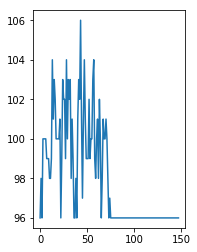

fin


In [10]:
matrice = [
        [1,2,3,4,5,6],
        [7,8,9,10,11,12],
        [13,14,15,16,17,18],
        [19,20,21,22,23,24],
        [25,26,27,28,29,30],
        [31,32,33,34,35,36]
        
    ]

recuit2(matrice,2,10,1000)
print("fin")

In [11]:
myGraph4 = nx.Graph()
matrice = [
[0,21,2,51],
[31,0,3,2],
[2,3,0,2],
[41,2,2,0]
]

for i in range(len(matrice)):
    myGraph4.add_node(i)

for i in range(len(matrice)) :
    for j in range(len(matrice)) :
        if(i>j) :
            print(matrice[i][j])
            myGraph4.add_edge(i,j,weight=matrice[i][j])

    
g4 = Network(height=700, width=700, notebook= True)
g4.toggle_hide_edges_on_drag(False)
g4.barnes_hut()
g4.from_nx(myGraph4)
g4.show("ex5.html")


31
2
3
41
2
2


[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]) array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
12
[[5, 4, 3, 9, 8, 2, 6], [1, 7]]


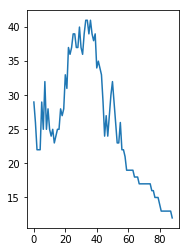

In [12]:
matrice2 = [
    [0,1,6,5,2,2,3,4,1,5],
    [1,0,3,4,1,2,4,2,1,3],
    [6,3,0,1,2,5,3,9,6,4],
    [5,4,1,0,7,3,1,5,2,7],
    [2,1,2,7,0,5,7,1,1,3],
    [2,2,5,3,5,0,6,3,2,6],
    [3,4,3,1,7,6,0,1,7,5],
    [4,2,9,6,1,3,1,0,2,3],
    [1,1,6,2,1,2,7,2,0,2],
    [5,3,4,7,3,6,5,3,2,0]
]

recuit2(matrice2,2,5,1000000)

[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]) array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
41
[[2, 1, 3, 8, 7, 9, 4], [5, 6]]


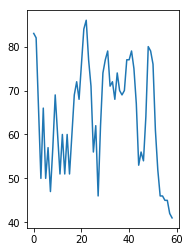

In [13]:
matrice3 = [
    [0,11,12,13,14,15,16,17,18,19],
    [11,0,3,4,1,2,4,2,1,3],
    [12,3,0,1,2,5,3,9,6,4],
    [13,4,1,0,7,3,1,5,2,7],
    [14,1,2,7,0,5,7,1,1,3],
    [15,2,5,3,5,0,6,3,2,6],
    [16,4,3,1,7,6,0,1,7,5],
    [17,2,9,6,1,3,1,0,2,3],
    [18,1,6,2,1,2,7,2,0,2],
    [19,3,4,7,3,6,5,3,2,0]
]

recuit2(matrice3,2,10,1000)

[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7'}
['0', '1', '2', '3', '4', '5', '6', '7']


<IPython.core.display.Javascript object>


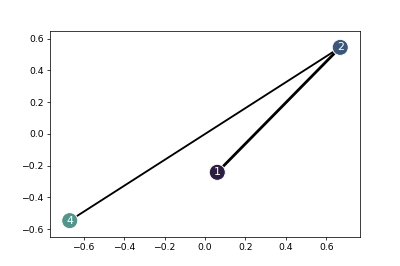

In [66]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import matplotlib.animation
%matplotlib notebook

# Create Graph
np.random.seed(2)
G = nx.cubical_graph()
print(G.nodes())

print(G.nodes())


labels2 = {}

for i in G.nodes():
    labels2[i]= str(i)

print(labels2)

G = nx.relabel_nodes(G, labels2)

print(G.nodes())

pos = nx.spring_layout(G)

#idx_colors = sns.cubehelix_palette(5, start=.5, rot=-.75)[::-1]
idx_weights = [3,2,1]

# Build plot
fig, ax = plt.subplots(figsize=(6,4))

paths = [
    ['C','CY','CYZ'],
    ['C','CZ','CYZ'],
    ['Z','YZ','CYZ']
]

paths = [
    [1,2,4],
    [1,5,3]
]

def convertPaths(paths):
    newPaths = []
    for path in paths:
        newPath = []
        for node in path:
            newPath.append(str(node))
        print("new path"+ str(newPath))
        newPaths.append(newPath)
    return newPaths
        
def test(num):
    ax.clear()
    i = num // 3
    j = num % 3 + 1
    path = ["1","2"]
    newPaths = convertPaths(paths)
    path = newPaths[num%2]
    print(path)


    # Query nodes
    query_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=path, node_color=idx_colors[:len(path)], ax=ax)
    query_nodes.set_edgecolor("white")
    nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)
    edgelist = [path[k:k+2] for k in range(len(path) - 1)]
    print("edge list" +str(edgelist))
    #edgelist = [['O', 'C'], ['C', 'CY']]
    nx.draw_networkx_edges(G, pos=pos, edgelist=edgelist, width=idx_weights[:len(path)], ax=ax)

    # Scale plot ax
    #ax.set_title("Frame %d:    "%(num+1) +  " - ".join(path), fontweight="bold")
    #ax.set_xticks([])
    #ax.set_yticks([])

#test(1)
ani = matplotlib.animation.FuncAnimation(fig, test, frames=6, interval=1000, repeat=True)
 #plt.show()